In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.figure_factory as ff


In [6]:
df = pd.read_csv(r'data\athlete_events.csv')
regions_df = pd.read_csv(
    r'data\noc_regions.csv')


In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df = df[df['Season'] == 'Summer']

In [5]:
df = df.merge(regions_df, on= 'NOC', how = 'inner')

In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9177
Height     51769
Weight     53764
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188124
region        21
notes     217802
dtype: int64

In [7]:
df.duplicated().sum()

1385

In [8]:
df.drop_duplicates(inplace= True)

In [9]:
df.duplicated().sum()

0

In [10]:
df = pd.concat([df,pd.get_dummies(df['Medal'])], axis = 1 )

In [11]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
77271,47034,Louis Hechenbleikner,M,38.0,178.0,67.0,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,USA,NaN,0,0,0
138327,62394,Ai Kondo Yoshida,F,35.0,161.0,58.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,NaN,Japan,NaN,0,0,0
45699,13670,Francesca Bortolozzi-Borella,F,24.0,170.0,55.0,Italy,ITA,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Women's Foil, Individual",NaN,Italy,NaN,0,0,0
101018,71278,Loong Whey Pyu,M,23.0,168.0,62.0,Malaysia,MAS,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,NaN,Malaysia,NaN,0,0,0
20270,37971,Adrian-Francisc Gal,M,21.0,NaN,NaN,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Men's Team All-Around,NaN,Romania,NaN,0,0,0


In [12]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending =False).reset_index().head(10)


,NOC,Gold,Silver,Bronze
0,USA,2472.0,1333.0,1197.0
1,URS,832.0,635.0,596.0
2,GBR,635.0,729.0,620.0
3,GER,592.0,538.0,649.0
4,ITA,518.0,474.0,454.0
5,FRA,463.0,567.0,587.0
6,HUN,432.0,328.0,363.0
7,SWE,354.0,396.0,358.0
8,AUS,342.0,452.0,510.0
9,GDR,339.0,277.0,227.0


In [13]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [14]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])


In [15]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values(
    'Gold', ascending=False).reset_index()


In [16]:
medal_tally.head()

,NOC,Gold,Silver,Bronze
0,USA,1035.0,802.0,708.0
1,URS,394.0,317.0,294.0
2,GBR,278.0,317.0,300.0
3,GER,235.0,261.0,283.0
4,FRA,234.0,256.0,287.0


In [17]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [18]:

year = df['Year'].unique().tolist()
year.sort()
year.insert(0, 'Overall')
year 

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [19]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0, 'Overall')


In [20]:

def fetch_medal_tally(df, year, country):

    medal_df = df.drop_duplicates(
        subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        flag =2
        temp_df = medal_df[(medal_df['Year'] == int(year)) &
                           (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[
            ['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    print(x)


# Overall Analysis


In [21]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [22]:
nation_participation = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [23]:
nation_participation

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [24]:
nation_participation.rename(columns={'index' : 'year', 'Year': 'Nations'}, inplace =True)

In [25]:
fig = px.line(nation_participation, x = 'year', y = 'Nations' )

In [26]:
fig

In [27]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

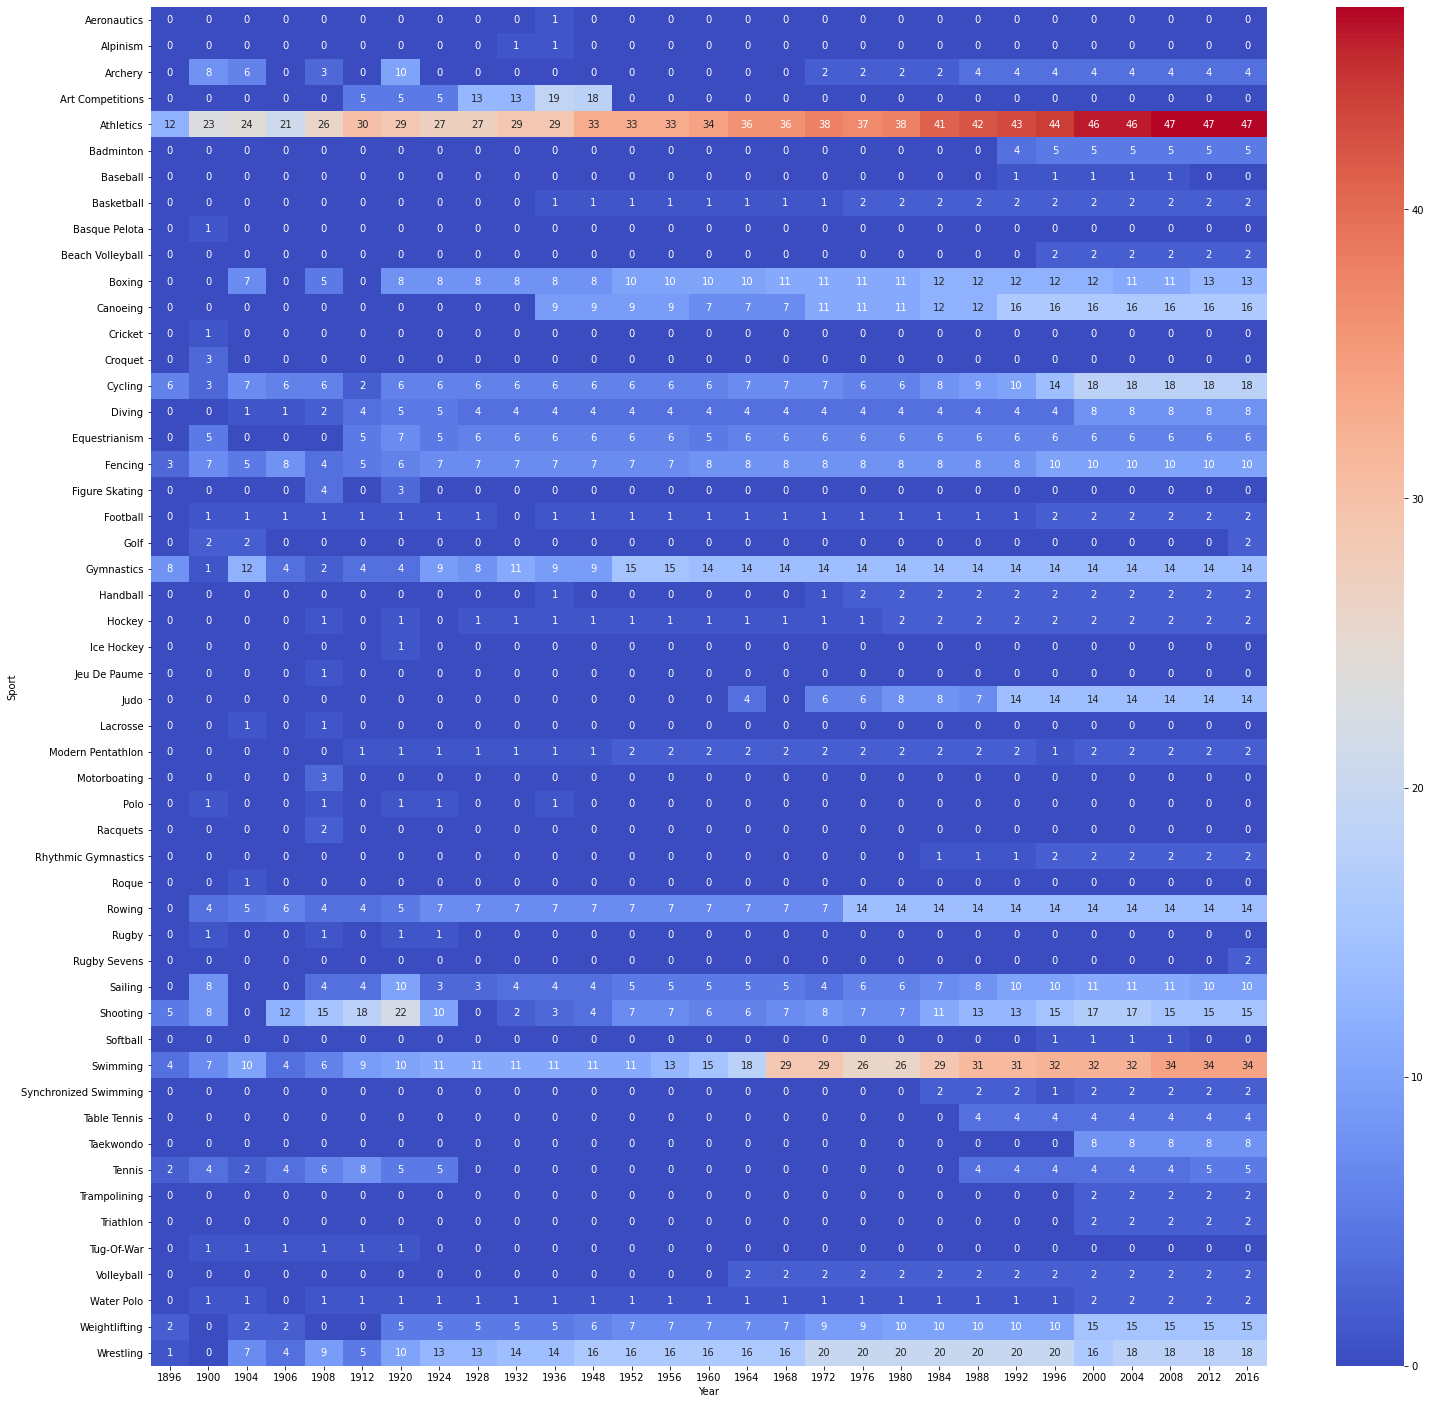

In [28]:
plt.figure(figsize = (25,25))
sns.heatmap(x.pivot_table(index= 'Sport', columns= 'Year', values='Event', aggfunc='count').fillna(0).astype(int), annot =True, cmap = 'coolwarm')

In [29]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [30]:
def most_succesful(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on = 'index', right_on = 'Name', how = 'left' )[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns = {'index': 'Athletes', 'Name_x': 'Total Medal Tally', 'region': 'Country'}, inplace = True)
    return x 

In [31]:
most_succesful(df,'Badminton')

,Athletes,Total Medal Tally,Sport,Country
0,Gao Ling,4,Badminton,China
5,Gir Yeong-A,3,Badminton,South Korea
8,Zhao Yunlei,3,Badminton,China
11,Lee Chong Wei,3,Badminton,Malaysia
15,Kim Dong-Mun,3,Badminton,South Korea
21,Fu Haifeng,3,Badminton,China
25,Zhang Nan,3,Badminton,China
34,Yang Wei,2,Badminton,China
60,Lee Yong-Dae,2,Badminton,South Korea
65,Lin Dan,2,Badminton,China


# Country Wise analysis

In [32]:
temp_df = df.dropna(subset= ['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\AVIRUP~1\AppData\Local\Temp/ipykernel_896/2599854442.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
year_df = temp_df[temp_df['region'] == 'India']
year_df = year_df.groupby('Year').count()['Medal'].reset_index()

In [34]:
fig = px.line(year_df, x = 'Year', y = 'Medal')
fig

<AxesSubplot:xlabel='Year', ylabel='Sport'>

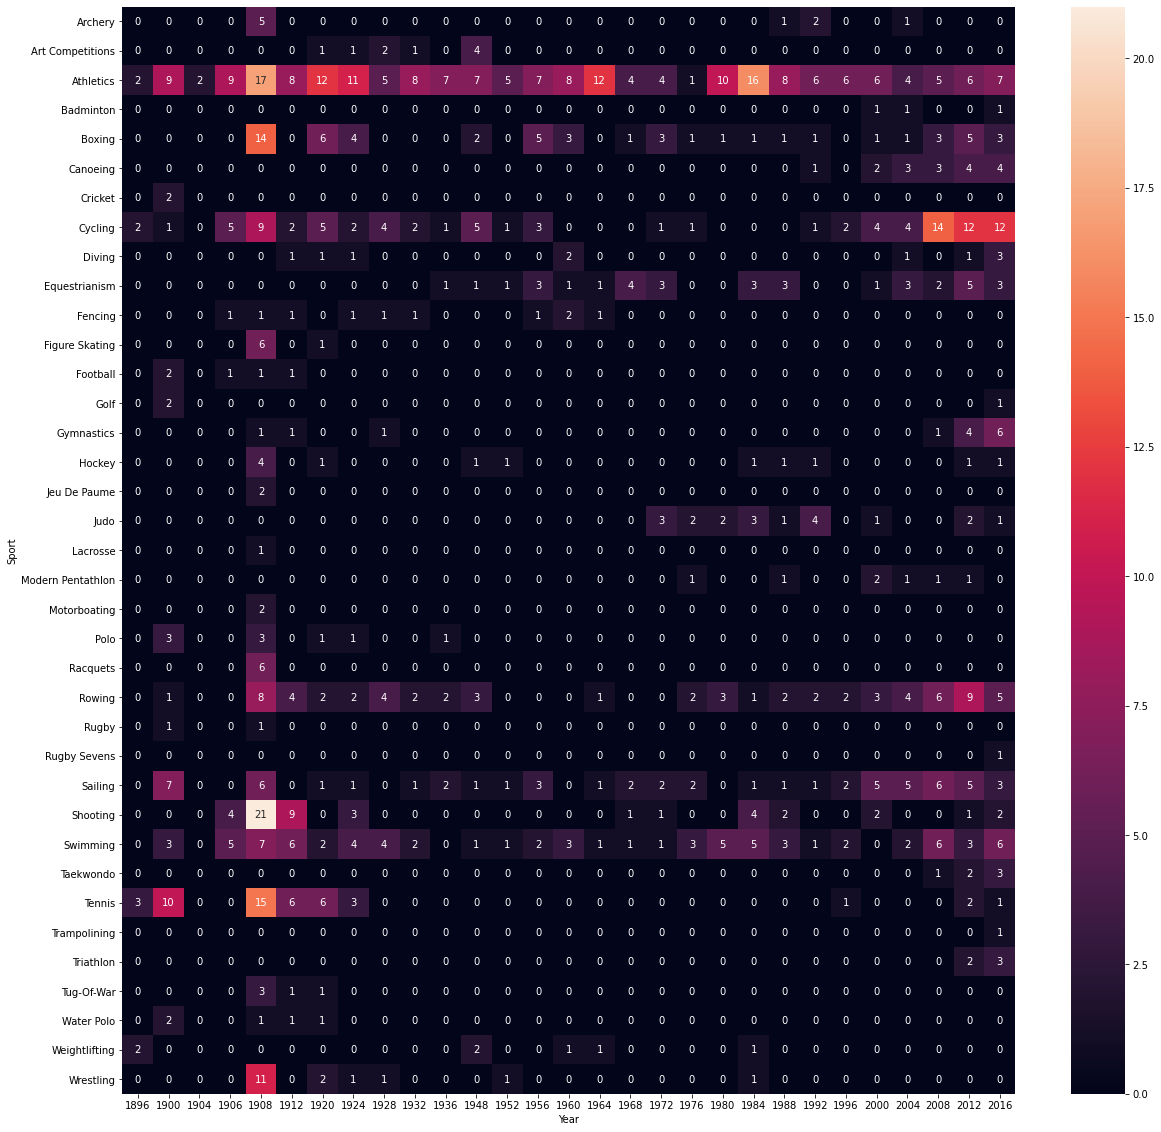

In [35]:
year_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize= (20,20))
sns.heatmap(year_df.pivot_table(index = 'Sport', columns = 'Year', values='Medal', aggfunc= 'count').fillna(0), annot = True)

In [38]:
athlete_df = df.drop_duplicates(subset = ['Name', 'region'])

In [43]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [44]:
ff.create_distplot([x1,x2,x3,x4], ['Overall Age Distribution', 'Gold Medalists', 'Silver Medalists', 'Bronze Medalists'], show_hist = False, show_rug = False)

In [45]:
athlete_df['Medal'].fillna('No Medal', inplace = True)

In [51]:
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
px.scatter(temp_df, x = 'Weight', y = 'Height' , color = 'Medal', symbol= 'Medal')

In [48]:
temp_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver


<AxesSubplot:xlabel='Weight', ylabel='Height'>

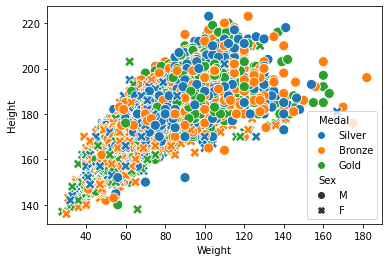

In [52]:
sns.scatterplot(data=df, x='Weight', y='Height',
                hue='Medal', style='Sex', s=100)


In [54]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()[
    'Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()[
    'Name'].reset_index()
final = men.merge(women, on='Year')
final


,Year,Name_x,Name_y
0,1900,1180,23
1,1904,629,6
2,1906,756,6
3,1908,1767,44
4,1912,1967,53
5,1920,2296,73
6,1924,2537,132
7,1928,2344,285
8,1932,1383,162
9,1936,3540,316
